In [1]:
import sys
import os

# Get the absolute path to `src/` (moving up one level and into `src/`)
module_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add to sys.path only if not already added
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

## Synthetic Data Testing

Iteration: 0, Loss: 298.6986
Iteration: 10, Loss: 0.2440
Iteration: 20, Loss: 0.2408
Iteration: 30, Loss: 0.2379
Iteration: 40, Loss: 0.2352
Iteration: 50, Loss: 0.2329
Iteration: 60, Loss: 0.2307
Iteration: 70, Loss: 0.2288
Iteration: 80, Loss: 0.2270
Iteration: 90, Loss: 0.2254
Iteration: 99, Loss: 0.2241


/var/folders/68/xwnqr4pd1z9627f5993vy5hm0000gn/T/ipykernel_49165/437110945.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, h.b), slope=float(h.w), color='C0')


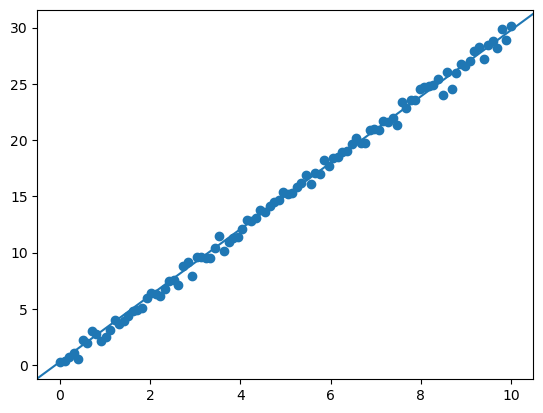

In [2]:
df = pd.read_csv("../data/synthetic_data.csv")
df.head(5)
train_x = df['X']
train_y = df['y']

plt.scatter(train_x, train_y)
h = LinearRegression(verbose=True)
h.fit(train_x,train_y)
plt.axline((0, h.b), slope=float(h.w), color='C0')

## California Housing Price Problem

R² Score: 0.5823054060438831


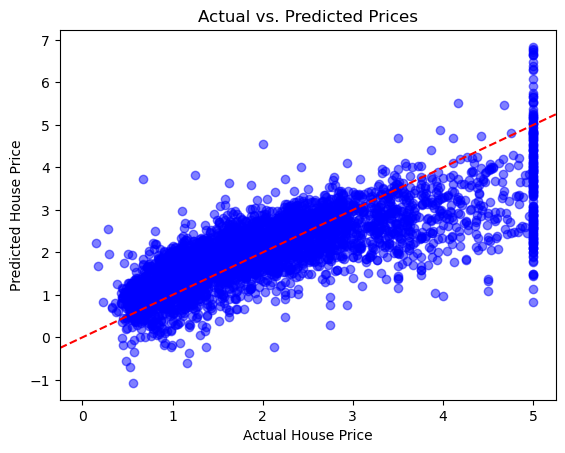

In [3]:
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

features = ["MedInc", "AveRooms", "AveOccup"]
more_features = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "Latitude", "Longitude"]
X = df[more_features].values 
y = df["target"].values

# Split into train & test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale train & test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


# Train model
h = LinearRegression(learning_rate=0.01, epochs=5000, verbose=False)
h.fit(X_train_scaled, y_train)

# Evaluate model
r2 = h.score(X_test_scaled, y_test)
print("R² Score:", r2)  # Should be close to 1 if fitted well

# Visualize prediction vs. actual values
y_pred = h.predict(X_test_scaled)

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs. Predicted Prices")
plt.axline((0, 0), slope=1, color='red', linestyle="--")  # Ideal perfect fit line
plt.show()


## Comparison

In [4]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

# Train sklearn model
sklearn_model = LR()
sklearn_model.fit(X_train_scaled, y_train)

# Predict with sklearn model
y_pred_sklearn = sklearn_model.predict(X_test_scaled)

# Compute R² Score
r2_sklearn = r2_score(y_test, y_pred_sklearn)

Performance Comparison:
Custom Model R²: 0.5823
scikit-learn R²: 0.5823


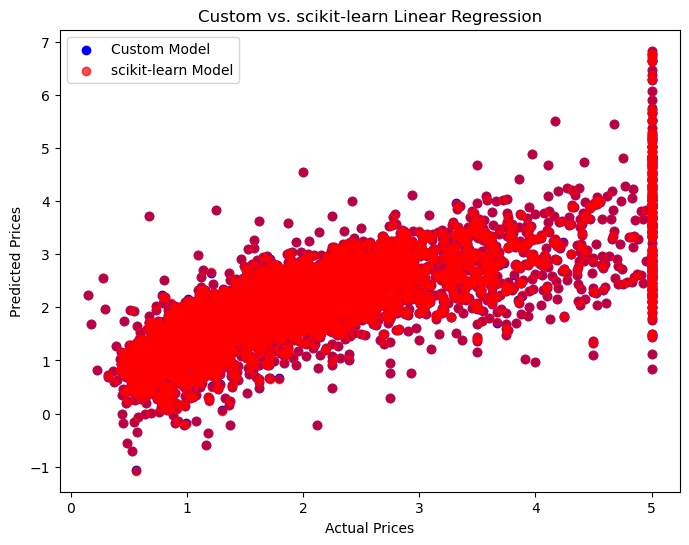

In [5]:
print("Performance Comparison:")
print(f"Custom Model R²: {r2:.4f}")
print(f"scikit-learn R²: {r2_sklearn:.4f}")


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", label="Custom Model")
plt.scatter(y_test, y_pred_sklearn, color="red", label="scikit-learn Model", alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Custom vs. scikit-learn Linear Regression")
plt.legend()
plt.show()
